# Принятие решений в бизнесе
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

**Задача:**
* Приоритизируйте гипотезы;
* Запустите A/B-тест;
* Проанализируйте результаты.

## Приоритизация гипотез

### Изучение данных из файла

Прежде всего **импортируем** необходимые нам для работы **библиотеки**. Делаем это в одном месте в самом начале, т.к. так удобнее и нагляднее - все библиотеки в одном месте.

In [1]:
# <импорт библиотеки pandas>
# <импорт библиотеки datetime>
# <импорт библиотеки numpy>
# <импорт библиотеки matplotlib>
# <импорт библиотеки scipy.stats>
# <конвертеры, которые позволяют использовать типы pandas в matplotlib 
# <отключаем предупреждения>
# <отображение строк целиком>

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

**Прочитаем** файл hypothesis.csv и **сохраним** его в переменной.

In [2]:
# <чтение файла с данными с сохранением в соответствующий датафрейм>

try:
    data = pd.read_csv('/datasets/hypothesis.csv') # файл с гипотезами
except:
    data = pd.read_csv('C:/Users/au21524/Documents/03_Jupyter/YP/Projects/08_AB_test_results/hypothesis.csv')

Пишем функцию для изучения файлов: получаем первые и последние **5 строк таблиц для изучения, а также смотрим описание таблиц и дубликаты.**

In [3]:
# функция для изучения файлов
def show_table_info(table):
    head_display = display(table.head()) # первые 5 строк
    tail_display = display(table.tail()) # последние 5 строк
    info_display = display(table.info()) # типы даных и пропуски
    duplicates_display = display(table.duplicated().sum()) # дубликаты

In [4]:
show_table_info(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,Hypothesis,Reach,Impact,Confidence,Efforts
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

0

Файл с гипотезами содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence и Efforts.

Дубликаты отсутствуют.

In [5]:
# Для удобства приведем заголовки к нижнему регистру
data.columns = data.columns.str.lower()

### ICE

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

Формула для расчета:
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [6]:
# Создаем дополнительный столбец ICE, в который помещаем результат вычислений
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
data = data.round({'ICE': 2})

# Выводим гипотезы в порядке убывания приоритета
data[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По методу ICE самые приоритетные гипотезы - это 8, 0 и 7.

### RICE

Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

Формула для расчета:
$$RICE = \frac{Reach * Impact * Confidence}{Efforts}$$

In [7]:
# Создаем дополнительный столбец RICE, в который помещаем результат вычислений
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

# Выводим гипотезы в порядке убывания приоритета
data[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По методу RICE самые приоритетные гипотезы - это 7, 2, 0 и 6.

Приоритизация гипотез изменилась при применении RICE вместо ICE. Так произошло, потому что мы добавили в расчет параметр Reach, т.е. скольких пользователей затронет изменение. Гипотезы 7, 2 т 6 имют высокий балл по этому параметру, поэтому выбиваются вперед.

### Вывод

Отобразим RICE и ICE в одной таблице.

Отсортируем сначала по RICE, т.к. он учитывает больше критериев, а затем по ICE.

In [8]:
data.sort_values(['RICE', 'ICE'], ascending=[False, False])

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


По методу ICE самые приоритетные гипотезы - это 8, 0 и 7.
По методу RICE самые приоритетные гипотезы - это 7, 2, 0 и 6.

Приоритизация гипотез разная, т.е. в метоже RICE учитывается параметр Reach, т.е. скольких пользователей затронет изменение.

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах orders и visitors.

### Изучение данных из файла

**Прочитаем** файлы и **сохраним** их в переменных.

In [9]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',') # файл с заказами
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',') # файл с пользователями
except:
    orders = pd.read_csv('C:/Users/au21524/Documents/03_Jupyter/YP/Projects/08_AB_test_results/orders.csv', sep=',')
    visitors = pd.read_csv('C:/Users/au21524/Documents/03_Jupyter/YP/Projects/08_AB_test_results/visitors.csv', sep=',')
    
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Изучим файлы, применив функцию для изучения.

In [10]:
show_table_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

0

Столбцы датафрейма **orders:**
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата заказа;
* revenue — выручка с заказа;
* group — группа A/B-теста (A или B).

Дубликатов нет.

In [11]:
show_table_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

0

Столбцы датафрейма **visitors:**
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Дубликатов нет.

Проверим, попали ли какие-либо пользователи и в группу А и в группу В.

In [12]:
(orders.groupby('visitorId').agg({'group':'nunique'})).count()

group    1031
dtype: int64

In [13]:
(orders.groupby('visitorId').agg({'group':'nunique'}).query('group > 1')).count()

group    58
dtype: int64

Таких пользователей всего 58, т.е. чуть более 5%. Это не много, не будем их удалять. 
Тем не менее необходимо сообщить о таких пользователях команде, занимающейся сбором информации по тесту, возможно есть какие-то технические проблемы.

Проверим как распредделены пользователи по группам.

In [14]:
orders.groupby(['group']).agg({'visitorId':'nunique'})

,visitorId
group,
A,503
B,586


В группе В больше пользователей совершили покупки. Но разница не большая.

### График кумулятивной выручки по группам

In [15]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))
display(cumulativeData.tail(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


,date,group,orders,buyers,revenue,visitors
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736
61,2019-08-31,B,640,586,5907760,18916


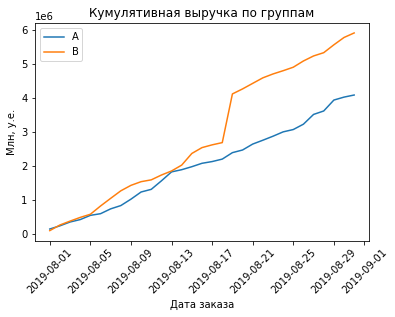

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('Млн, у.е.')
plt.xlabel('Дата заказа')
plt.title('Кумулятивная выручка по группам');

Сегмент В на протяжении всего теста показывает себя лучше, чем сегмент А. Разрыв увеличивается во второй половине месяца.

### График кумулятивного среднего чека по группам

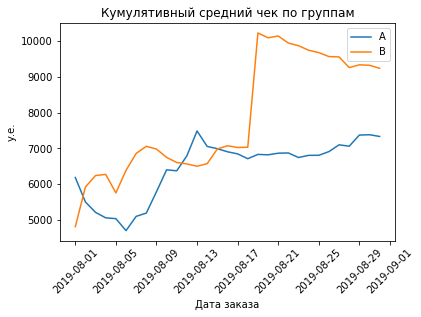

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('у.е.')
plt.xlabel('Дата заказа')
plt.title('Кумулятивный средний чек по группам');

Сегмент В почти всегла лидирует. Есть один резкий всплеск, скорее всего это аномально большой заказ. Проанализируем эти выбросы позже.

### График относительного изменения кумулятивного среднего чека группы B к группе A

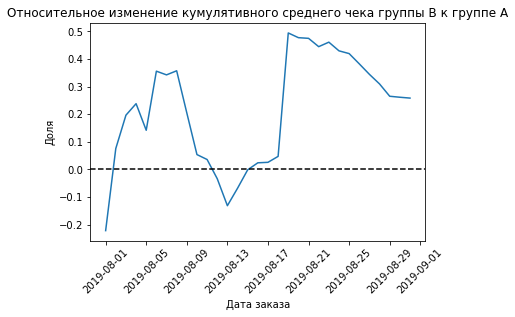

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('Доля')
plt.xlabel('Дата заказа')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A');

Результаты теста значительно и резко менялись несколько раз. Скорее всего это аномальные заказы.

### График кумулятивной конверсии по группам

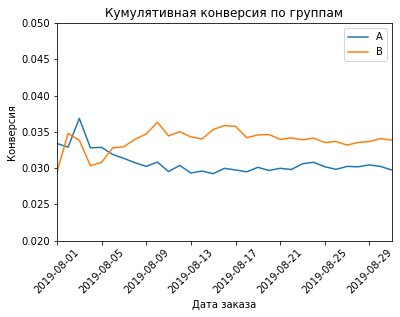

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.05]) 
plt.ylabel('Конверсия')
plt.xlabel('Дата заказа')
plt.title('Кумулятивная конверсия по группам');

В самом начале теста группа А показывала болшую конверсию, но постепенно группа В заняла лидирующие позиции. 

### График относительного изменения кумулятивной конверсии группы B к группе A

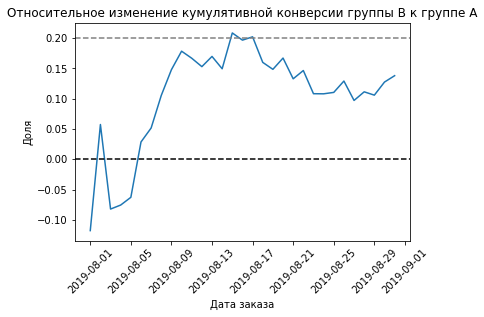

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=45)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.ylabel('Доля')
plt.xlabel('Дата заказа')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A');

Почти с самого начала теста группа В лидирует по конверсии: резко растет, затем постепенно падает, так и не зафиксировавшись.

### График количества заказов по пользователям

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False) # группируем заказы по пользователям
    .agg({'transactionId': 'nunique'})
) # считаем число уникальных заказов по сгруппированным данным
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10) # сортируем по количеству заказов

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим гистограмму распределения числа заказов по пользователям методом hist().

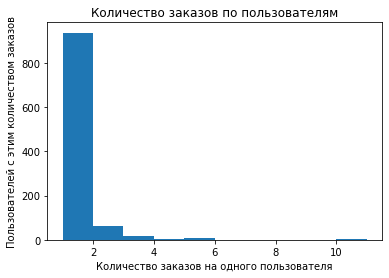

In [22]:
plt.hist(ordersByUsers['orders'])
plt.ylabel('Пользователей с этим количеством заказов')
plt.xlabel('Количество заказов на одного пользователя')
plt.title('Количество заказов по пользователям');

Большинство пользователей совершило один заказ. Но есть пользователи, которые совершили 2, 3 и даже более заказов. Посмотрим распределение на другом графике.

Построим диаграмму методом scatter().

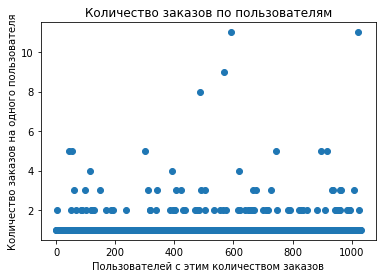

In [23]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Количество заказов на одного пользователя')
plt.xlabel('Пользователей с этим количеством заказов')
plt.title('Количество заказов по пользователям');

Пользователей, заказавших более 2 раз мало. Они могут быть аномальными.

Чтобы выяснить это, посчитаем перцентили.

### 95-й и 99-й перцентили количества заказов на пользователя

In [24]:
# находим перцентили
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершили больше 2 заказов и не более 1% сделали более 4 заказов.

Будем считать 2 заказа границей для выбросов.

Создадим переменную orders_nb_percentile для хранения 95 персентиля и использования в дальнейшей аналитике.

In [25]:
orders_nb_percentile = int(np.percentile(ordersByUsers['orders'], [95]))
orders_nb_percentile

2

### Точечный график стоимостей заказов

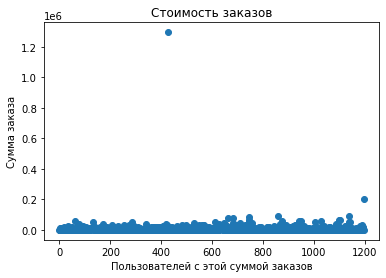

In [26]:
# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.ylabel('Сумма заказа')
plt.xlabel('Пользователей с этой суммой заказов')
plt.title('Стоимость заказов');

Есть 2 явных выброса в районе 1,3 млн и 200 000.

Мы нашли заказ, который внес искажения на графики выше, т.е. наше предположение подтвердилось.

Найдем перцентили.

###  95-й и 99-й перцентили стоимости заказов

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Лишь в 1% случаев стоимость заказов более 58 тысяч, а в 5% случаев соимость заказа более 28 тысяч.

Т.к. мы уже взяли 95 перцентиль для фильтра по количеству заказов, то для отсечения аномалий в стоимости заказов возьмем 99 персентиль, т.е. 58 тысяч границей для выбросов. В проивном случае мы потеряем более 5% данных теста.

Создадим переменную orders_revenue_percentile для хранения 99 персентиля и использования в дальнейшей аналитике.

In [28]:
orders_revenue_percentile = int(np.percentile(orders['revenue'], [99]))
orders_revenue_percentile

58233

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

display("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


'0.01679'

'0.138'

P-value = 0,01679, т.е. меньше, чем 0,05. Следовательно отвергаем нулевую гипотезу. Анализ "сырых" данных сообщает, что в конверсии между группами есть статистиески значимые различия. Относительный прирост конверсии групы В к конверси группы А равен 13,8%.

Сравним средние чеки по "сырым" даным.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [30]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.729'

'0.259'

P-value = 0,729, т.е. больше, чем 0,05. Следовательно не отвергаем нулевую гипотезу. Статичтически значимых различий в среднем чеке "сырых" данных нет. Относительное различие среднего чека между группами 26%.

Приступим к анализу аномалий.

### Анализ аномалий

95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил более 2 заказов, или совершил заказ на сумму свыше 58 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 1% заказов с наибольшей стоимостью.

Удалим именно пользователей. Сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных.

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_nb_percentile]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_nb_percentile]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders_revenue_percentile]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'0.01007'

'0.174'

P-value = 0,01007, т.е. меньше, чем 0,05. Следовательно отвергаем нулевую гипотезу. Анализ "очищенных" данных сообщает, что в конверсии между группами есть статистиески значимые различия. Точно так же как и в "сырых" данных. Относительный прирост конверсии групы В к конверси группы А равен 17,4%.

Сравним средние чеки по "очищенным" даным.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'0.798'

'-0.020'

P-value = 0,798, т.е. значительно больше, чем 0,05. Следовательно не отвергаем нулевую гипотезу. Статичтически значимых различий в среднем чеке "очищенных" данных нет. Относительное различие среднего чека между группами 2%.

## Выводы из A/B-теста

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий;
* По сырым данным и очищенным данным нет статистически значимого различия по среднему чеку между группами.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
* График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

**Итог: Остановить тест и признать его успешным.**

**Результаты группы В лучше результатов группы А**